In [91]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [92]:
# Initialisierung von DataFrames und Data Cleaning
df = pd.read_csv('Laptop-Preise.csv', sep=';', decimal=',')
df = df[df.extern_Schnittstellen != 2300] # Ausreißer löschen
df = df.reset_index(drop=True) # Reset Index
df.drop(['Betriebssystem_OHNE', 'Betriebssystem_Mac', 'Marke_Dell'], axis=1) # Mac und Marke_Apple sind identische Merkmale

df_noPrice = df.drop('Preis', axis=1)

In [97]:
# OLS Model 
# fitting the model 
model = sm.OLS(df['Preis'], sm.add_constant(df_noPrice)).fit()
print('#'*23, '\n', 'SE von Preis = ', np.round(stats.sem(df['Preis']), 4), '\n', '#'*23, '\n', sep="")


std_y = df['Preis'].std()
std_x = df_noPrice.std()

# model.params[1:] sind alle Koeffizienten ohne Intercept
# Multipliziert mit ihrer Standardabweichung und geteilt durch die Standardabweichung von y (Preis)
standardized_coefs = abs(model.params[1:] * df_noPrice.std() / std_y)
print(standardized_coefs.abs())


#######################
SE von Preis = 23.2318
#######################

Kerne                             0.141045
Takt_Prozessor                    0.055089
Arbeitsspeicher                   0.259367
Bild_Display                      0.004459
Speicher_Grafik                   0.010820
extern_Schnittstellen             0.042096
HDD                               0.034367
SSD                               0.114271
Akku_Kapazitaet                   0.263387
PPI_Display                       0.112571
Pixelshader                       0.110205
Typ_Arbeitsspeicher_DDR_4         0.074712
Laufwerk_VORHANDEN                0.040731
Lautsprecher_UEBERDURCHSCHN       0.037122
Tastatur_Beleuchtung_vorhanden    0.070204
Fingerabdrucksensor_vorhanden     0.030901
Touchscreen_vorhanden             0.045722
Mobilfunk_vorhanden               0.126480
NFC_vorhanden                     0.045138
Akku_Typ_ION                      0.036040
Marke_HP                          0.110399
Marke_ASUS               

In [94]:
sorted_coefs = standardized_coefs.sort_values(ascending=False)

# Print the sorted values
# print(sorted_coefs)

# Get the top 5 largest values
top_5_coefs = sorted_coefs.head(5)
print(top_5_coefs)

Akku_Kapazitaet        0.263387
Arbeitsspeicher        0.259367
Kerne                  0.141045
Mobilfunk_vorhanden    0.126480
SSD                    0.114271
dtype: float64


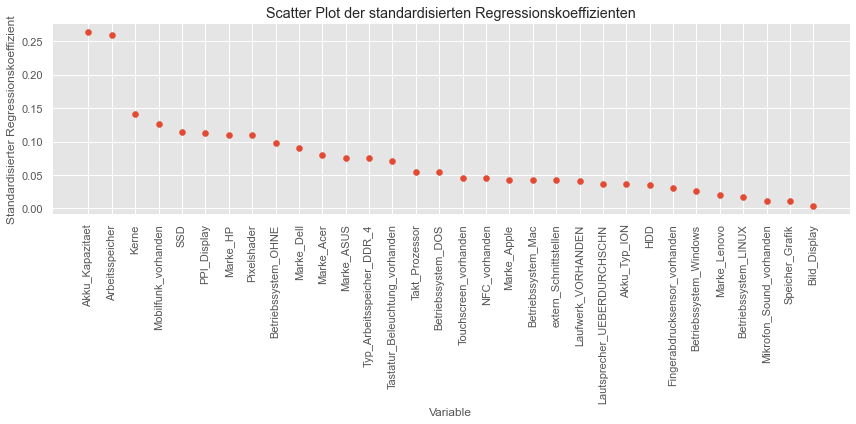

In [95]:
plt.style.use('ggplot')

# Sort the standardized_coefs in descending order
sorted_coefs = standardized_coefs.sort_values(ascending=False)

# Plot the absolute values of coefficients as points with labels
plt.figure(figsize=(12, 6))
plt.scatter(sorted_coefs.index, sorted_coefs.values, marker='o')
plt.title('Scatter Plot der standardisierten Regressionskoeffizienten')
plt.xlabel('Variable')
plt.ylabel('Standardisierter Regressionskoeffizient')
plt.xticks(rotation=90)

# Add labels to each point
# for i, (variable, coef) in enumerate(zip(sorted_coefs.index, sorted_coefs.values)):
#     plt.text(i, coef, f'{variable}\n{coef:.3f}', ha='center', va='bottom', rotation=45, fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()


Wir können anhan der standardisierten Regressionskoeffizienten erkennen, dass die Variablen 
Akku_Kapazitaet        0.263387
Arbeitsspeicher        0.259367
Kerne                  0.141045
Mobilfunk_vorhanden    0.126480
SSD                    0.114271
einen besonders hohen Erklärungsgehalt bieten. Sie besitzen betragsmäßig den höchsten standardisierten Regressionskoeffizienten. Wir nehmen für künftige Untersuchungen diese fünf Variablen. 